In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from keras.callbacks import ModelCheckpoint, EarlyStopping
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
import os
import time

In [2]:
# # from google.colab import drive
# # drive.mount('/content/drive')
# !pip install opencv-python

In [3]:
import cv2
path="/home/iga/Downloads/prediksi_sayur/dataset/Dataset_kak_suci"
def read_image(path):
    im = cv2.imread(str(path))
    return cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

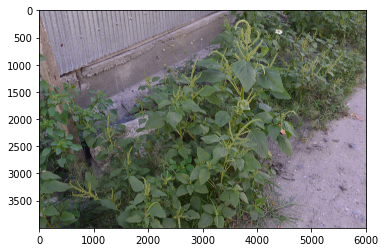

In [4]:
im = read_image('/home/iga/Downloads/prediksi_sayur/dataset/Dataset_kak_suci/Bayam Duri/b-DSC_0693.JPG')
plt.imshow(im)

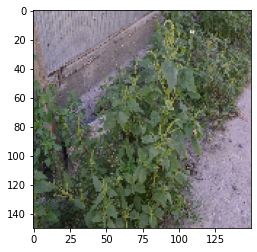

In [5]:
resized = cv2.resize(im, (150,150))
plt.imshow(resized)

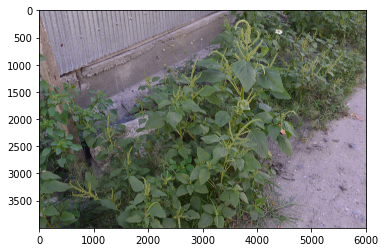

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib.pyplot import imread, imshow, subplots, show


def plot(data_generator):
    """
    Plots 4 images generated by an object of the ImageDataGenerator class.
    """
    data_generator.fit(images)
    image_iterator = data_generator.flow(images)
    
    # Plot the images given by the iterator
    fig, rows = subplots(nrows=1, ncols=4, figsize=(18,18))
    for row in rows:
        row.imshow(image_iterator.next()[0].astype('int'))
        row.axis('off')
    show()
    
image = imread("/home/iga/Downloads/prediksi_sayur/dataset/Dataset_kak_suci/Bayam Duri/b-DSC_0693.JPG")

# Creating a dataset which contains just one image.
images = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

imshow(images[0])
show()

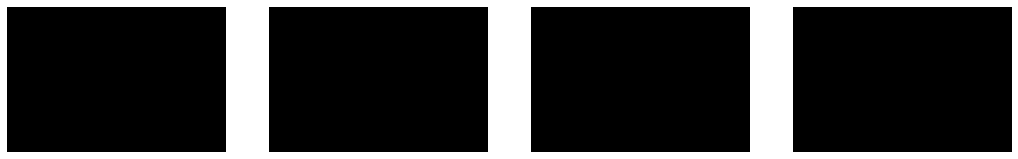

In [7]:
#reschale
data_generator = ImageDataGenerator(rescale = 1./255)
plot(data_generator)

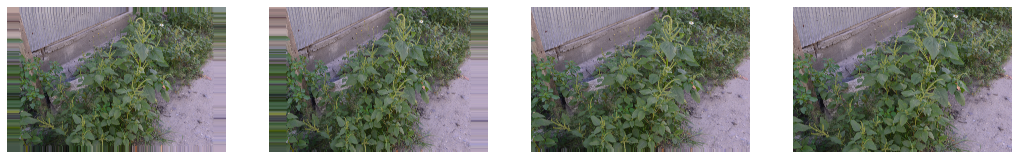

In [8]:
#Zoom Range 
data_generator = ImageDataGenerator(zoom_range=0.2)
plot(data_generator)

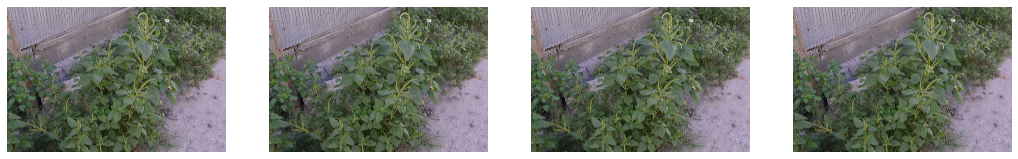

In [9]:
#shear range 
data_generator = ImageDataGenerator(shear_range=0.2)
plot(data_generator)

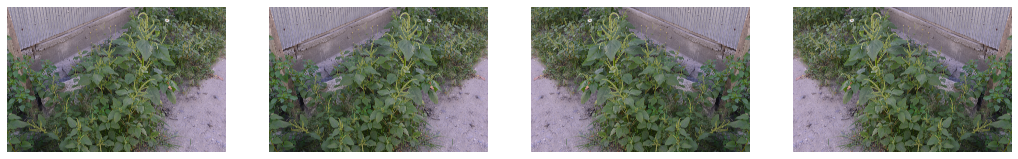

In [10]:
#Horizontal flip 

data_generator = ImageDataGenerator(horizontal_flip=True)
plot(data_generator)

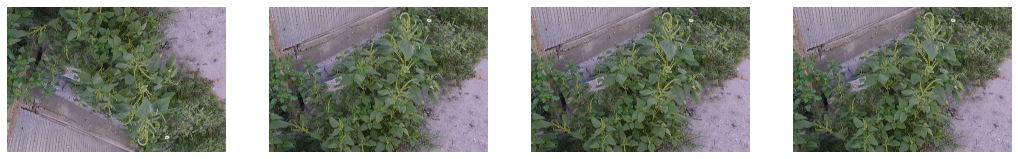

In [11]:
#vertical flip 

data_generator = ImageDataGenerator(vertical_flip=True)
plot(data_generator)

In [12]:
# from keras.preprocessing.image import ImageDataGenerator
# train_dir = "/content/drive/MyDrive/Dataset_kak_suci/Train"
# test_dir = "/content/drive/MyDrive/Dataset_kak_suci/Test"
# val_dir = "/content/drive/MyDrive/Dataset_kak_suci/Valid"

# train_datagen = ImageDataGenerator(rescale=1./255,
#                                    shear_range=0.2,
#                                    zoom_range=0.2,
#                                    width_shift_range=0.2,
#                                    height_shift_range=0.2,
#                                    fill_mode='nearest',
#                                    horizontal_flip = True)

# test_datagen = ImageDataGenerator(rescale = 1./255)


# train_gen= train_datagen.flow_from_directory(train_dir,
#                                                  target_size = (227, 227),
#                                                  batch_size = 32,
#                                                  class_mode = 'categorical')

# test_gen= test_datagen.flow_from_directory(test_dir,
#                                                  target_size = (227, 227),
#                                                  batch_size = 32,
#                                                  class_mode = 'categorical')

# val_gen= test_datagen.flow_from_directory(val_dir,
#                                             target_size = (227, 227),
#                                             batch_size = 32,
#                                             class_mode = 'categorical')

In [23]:
data_path = "/home/iga/Downloads/prediksi_sayur/dataset/Dataset_kak_suci"

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.3,
                                   rotation_range=30,
                                   horizontal_flip = True,
                                   validation_split=0.3)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(data_path, 
                                                    shuffle = True,
                                                    batch_size=32, 
                                                    class_mode='categorical',
                                                    subset = 'training',
                                                    target_size=(227,227))


valid_generator = train_datagen.flow_from_directory(
    data_path, 
    shuffle = True,
    batch_size=32,
    class_mode='categorical',
    subset = 'validation',
    target_size=(227,227))



Found 271 images belonging to 4 classes.
Found 115 images belonging to 4 classes.


In [14]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,ZeroPadding2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


In [15]:
model=Sequential()

#1 conv layer
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#2 conv layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#3 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#4 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#5 conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())


model.add(Flatten())

#1 dense layer
model.add(Dense(4096,input_shape=(227,227,3)))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#2 dense layer
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#3 dense layer
model.add(Dense(1000,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#output layer
model.add(Dense(4,activation="softmax"))

2022-05-13 00:44:43.713384: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-13 00:44:44.766629: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-13 00:44:44.767248: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-13 00:44:44.777819: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [24]:
# model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# model.compile(
#     loss='categorical_crossentropy',
#     optimizer=tf.optimizers.SGD(lr=0.001),
#     metrics=['accuracy']    
# )

model.compile(optimizer=tf.optimizers.SGD(learning_rate=0.001, momentum=0.9, decay=0.005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

hist=model.fit(x = train_generator, 
          steps_per_epoch = len(train_generator),
          epochs = 40,
          validation_data = valid_generator,
          callbacks = [callback],
          validation_steps = len(valid_generator),
)

Epoch 1/40
9/9 [==============================] - 49s 5s/step - loss: 0.3888 - accuracy: 0.8376 - val_loss: 1.4609 - val_accuracy: 0.5304
Epoch 2/40
9/9 [==============================] - 45s 5s/step - loss: 0.3540 - accuracy: 0.8487 - val_loss: 0.9520 - val_accuracy: 0.6348
Epoch 3/40
9/9 [==============================] - 44s 5s/step - loss: 0.3891 - accuracy: 0.8266 - val_loss: 0.6661 - val_accuracy: 0.7391
Epoch 4/40
9/9 [==============================] - 43s 5s/step - loss: 0.3769 - accuracy: 0.8708 - val_loss: 0.5847 - val_accuracy: 0.7391
Epoch 5/40
9/9 [==============================] - 42s 5s/step - loss: 0.3125 - accuracy: 0.8856 - val_loss: 0.5386 - val_accuracy: 0.7826
Epoch 6/40
9/9 [==============================] - 41s 5s/step - loss: 0.3541 - accuracy: 0.8635 - val_loss: 0.5742 - val_accuracy: 0.8174
Epoch 7/40
9/9 [==============================] - 42s 5s/step - loss: 0.3681 - accuracy: 0.8782 - val_loss: 0.5398 - val_accuracy: 0.8348
Epoch 8/40
9/9 [==================

In [ ]:
# test_loss = model3.evaluate(train_gen)
# print(f'Test loss : {str(test_loss[1])}')
# print(f'Test Accuracy : {test_loss[1] * 100:.2f}%')

In [27]:
model.save('result/batch_32_augmented.h5')

Text(0.5, 1.0, 'Training and validation loss')

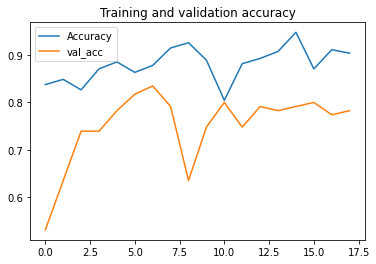

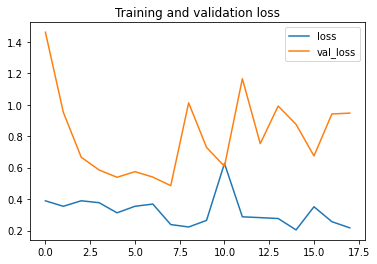

In [26]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))
 
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.legend(["Accuracy","val_acc"])
plt.title('Training and validation accuracy')
 
plt.figure()
 
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.legend(["loss","val_loss"])
plt.title('Training and validation loss')

In [ ]:
from keras.models import load_model
model1 = load_model('sgd.h5')
import gradio as gr
target_names = ['Cendrawasih Kuning Besar','Jalak Bali','Kakak Tua Putih Jambul Kuning','Kasuari','Maleo','Merak Biru']
def predict_image(img):
    input=img.reshape(-1,150,150,3)
    prediction=model1.predict(input)[0]
    return {target_names[i]: float(prediction[i]) for i in range(6)}

image = gr.inputs.Image(shape=(150,150))
label = gr.outputs.Label(num_top_classes=6)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')